In [28]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.phonon.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np
with MPRester("ittkwe9m4QMvQT1m") as m:


    # Structure for material id
    structure = m.get_phonon_bandstructure_by_material_id("mp-924129")
    
phonon_plt = PhononBSPlotter(structure)

# Graphe courbes de dispersion

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

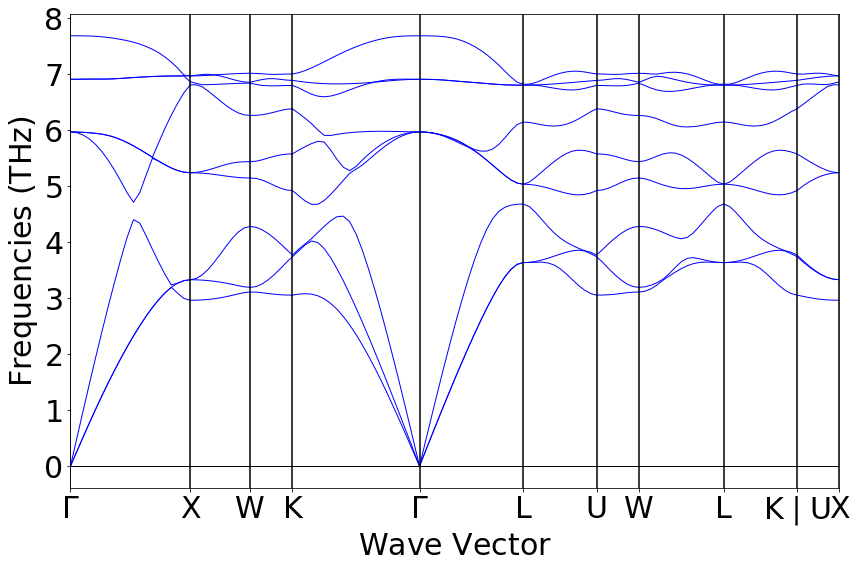

In [29]:
phonon_plt.get_plot()

# Graphe zone de Brillouin

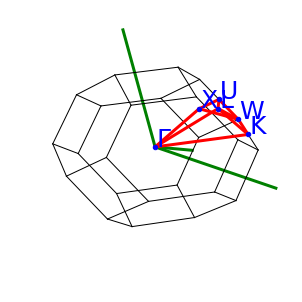

In [30]:
phonon_plt.plot_brillouin()

# Obtention des 3 directions différentes

In [31]:
data = phonon_plt.bs_plot_data() 
frequency = data.get("frequency")
#On prends 3 directions différentes
curve1 = frequency[3][0]
curve2 = frequency[4][1]
curve3 = frequency[5][2]

# Calcul de la vitesse du son pour ces 3 directions

In [32]:
#calcul des différentes pentes
distance= data.get("distances")

def dfdq1(frequence,q):
    pente = np.abs((frequence[-1] - frequence[-2])*10**12)/((q[-1]-q[-2])*10**10)
    return pente
def dfdq2(frequence,q):
    pente = np.abs((frequence[1]-frequence[0])*10**12)/((q[1]-q[0])*10**10)
    return pente

vs1 = 2*np.pi*dfdq1(curve1,distance[3])
vs2 = 2*np.pi*dfdq2(curve2,distance[4])
vs3 = 2*np.pi*dfdq1(curve3,distance[5])

print("La vitesse du son de la courbe 1 dans la direction \u004B - \u0393 vaut "+str(vs1)+" m/s.")
print("La vitesse du son de la courbe 2 dans la direction \u0393 - \u004C vaut "+str(vs2)+" m/s.")
print("La vitesse du son de la courbe 3 dans la direction \u004C - \u0055 vaut "+str(vs3)+" m/s.")

La vitesse du son de la courbe 1 dans la direction K - Γ vaut 3003.495130714942 m/s.
La vitesse du son de la courbe 2 dans la direction Γ - L vaut 3278.007753621656 m/s.
La vitesse du son de la courbe 3 dans la direction L - U vaut 592.8387670869776 m/s.


# Graphe des vitesses de son obtenus

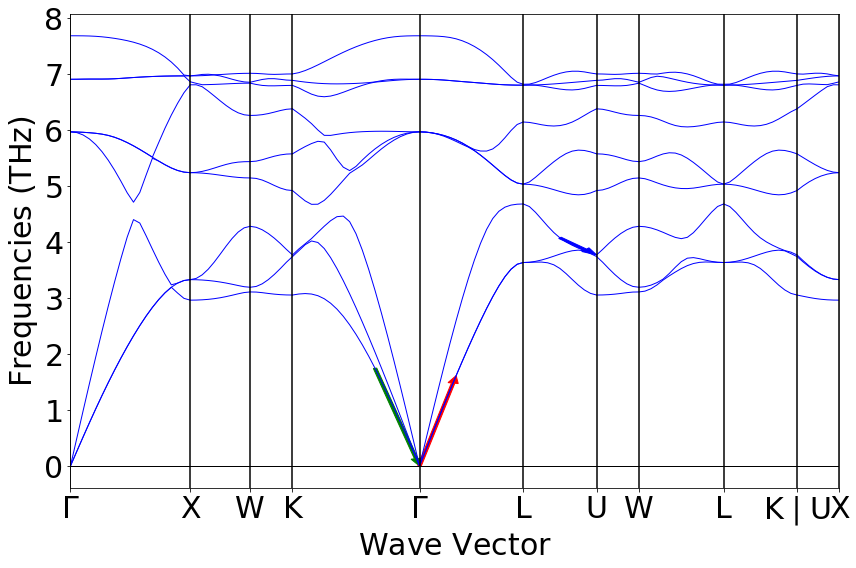

In [39]:
phonon_plt.get_plot()
#La pente 1 est représentée en vert
plt.arrow(distance[3][13],curve1[13],distance[3][-1]-distance[3][13],curve1[-1]-curve1[13], color='green',width = 0.03,length_includes_head =True)
#La pente 1 est représentée en rouge
plt.arrow(distance[4][0],curve2[0],distance[4][6]-distance[4][0],curve2[6]-curve2[0], color='red',width = 0.03,length_includes_head =True)
#La pente 1 est représentée en bleu
plt.arrow(distance[5][6],curve3[6],distance[5][-1]-distance[5][6],curve3[-1]-curve3[6], color='blue',width = 0.03,length_includes_head =True)